In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats import beta
from scipy import stats
np.random.seed(seed=42)
import math 
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [2]:
import random
from random import randint

In [3]:
import re  

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [5]:
accidents3 = pd.read_csv('~/Downloads/Accidents3.csv', delimiter = ',', header = 0)

In [6]:
accidents3 = accidents3.drop(columns='Unnamed: 0')

In [7]:
accidents3['Start_Time'] = pd.to_datetime(accidents3['Start_Time'], errors='coerce')
accidents3['End_Time'] = pd.to_datetime(accidents3['End_Time'], errors='coerce')

In [9]:
pd.set_option('display.max_columns', 500)

In [10]:
accidents3.drop(['Turning_Loop', 'Duration', 'Durination_InMinutes'], axis=1, inplace = True)

In [11]:
accidents3['TimeofAccident'] = pd.to_datetime(accidents3['Start_Time'], errors='coerce')
accidents3['Hour'] = accidents3['Start_Time'] .dt.hour
accidents3['Minute'] = accidents3['Start_Time'] .dt.minute

In [12]:
accidents3.round(1)

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,DayOfWeek,TimeofAccident,Hour,Minute
0,A-1226926,201.0,3,2019-04-10 06:46:29,2019-04-10 07:32:00,34.0,-118.4,0.0,Restrictions due to accident on I-405 Southbou...,I-405 N,R,Culver City,Los Angeles,CA,90230,US,Pacific,61.0,61.0,34.0,29.9,10.0,VAR,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019,Apr,Wed,2019-04-10 06:46:29,6,46
1,A-1325453,201.0,3,2019-02-01 06:42:02,2019-02-01 07:26:44,33.1,-86.7,14.6,Accident on I-65 Northbound between Exit 219 C...,I-65 N,R,Calera,Shelby,AL,35040,US,Central,34.0,NaN,73.0,30.3,10.0,CALM,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019,Feb,Fri,2019-02-01 06:42:02,6,42
2,A-2537109,NaN,2,2016-11-16 08:34:24,2016-11-16 14:34:24,35.1,-90.0,0.5,At I-240/Exit 6 - Accident.,I-55 N,R,Memphis,Shelby,TN,38106,US,Central,62.1,NaN,58.0,30.0,10.0,S,3.5,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,Day,2016,Nov,Wed,2016-11-16 08:34:24,8,34
3,A-1197059,201.0,2,2019-05-30 06:30:42,2019-05-30 08:30:27,39.8,-84.2,0.0,Accident on Stanley Ave near Farr Dr.,Stanley Ave,R,Dayton,Montgomery,OH,45404-2732,US,Eastern,67.0,67.0,96.0,28.9,10.0,S,6.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019,May,Thurs,2019-05-30 06:30:42,6,30
4,A-1558772,201.0,3,2018-10-02 18:51:43,2018-10-02 19:20:55,32.9,-80.0,0.0,Right lane blocked due to accident on I-26 Wes...,I-26 W,R,Charleston,Charleston,SC,29406,US,Eastern,81.0,NaN,65.0,30.1,10.0,East,6.9,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,Day,2018,Oct,Tues,2018-10-02 18:51:43,18,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-564941,201.0,3,2020-06-08 08:45:02,2020-06-08 09:44:29,33.7,-112.1,0.0,Left hand shoulder blocked due to accident on ...,Black Canyon Fwy S,R,Phoenix,Maricopa,AZ,85083,US,Mountain,73.0,73.0,15.0,28.2,10.0,SW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,2020,Jun,Mon,2020-06-08 08:45:02,8,45
499996,A-3329214,NaN,2,2018-04-11 07:10:42,2018-04-11 13:10:42,26.0,-80.2,0.7,At SR-822/Sheridan St/Exit 21 - Accident.,I-95 S,R,Hollywood,Broward,FL,33020,US,Eastern,70.0,NaN,97.0,30.0,10.0,N,9.2,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Day,2018,Apr,Wed,2018-04-11 07:10:42,7,10
499997,A-223133,201.0,3,2017-01-11 06:19:21,2017-01-11 07:04:05,39.6,-84.2,0.0,Accident on I-675 Northbound at Exits 4 4B OH-...,Far Hills Ave,R,Dayton,Montgomery,OH,45459,US,Eastern,30.9,22.2,92.0,30.2,8.0,S,10.4,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Night,2017,Jan,Wed,2017-01-11 06:19:21,6,19
499998,A-594598,201.0,2,2020-03-13 16:04:28,2020-03-13 17:38:50,38.7,-122.6,0.0,Accident on CA-29 Northbound after Lawley Rd.,Lake County Hwy,R,Pope Valley,Napa,CA,94567,US,Pacific,55.0,55.0,72.0,29.6,6.0,W,8.0,0.0,Haze,False,False,False,False,False,False,False,False,False,False,False,False,Day,2020,Mar,Fri,2020-03-13 16:04:28,16,4


In [32]:
accidents3['Start_Date'] = accidents3['Start_Time'].dt.date

In [33]:
accidents3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 500000 non-null  object        
 1   TMC                352909 non-null  float64       
 2   Severity           500000 non-null  int64         
 3   Start_Time         500000 non-null  datetime64[ns]
 4   End_Time           500000 non-null  datetime64[ns]
 5   Start_Lat          500000 non-null  float64       
 6   Start_Lng          500000 non-null  float64       
 7   Distance(mi)       500000 non-null  float64       
 8   Description        500000 non-null  object        
 9   Street             500000 non-null  object        
 10  Side               500000 non-null  object        
 11  City               499985 non-null  object        
 12  County             500000 non-null  object        
 13  State              500000 non-null  object  

In [39]:
# cars = accidents3.groupby(['Start_Date'])['ID'].count().reset_index()
# cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Start_Date  1594 non-null   object
 1   ID          1594 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.0+ KB


In [46]:
cali = accidents3[accidents3['State']=='CA']
cali.head()

,ID,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Year,Month,DayOfWeek,TimeofAccident,Hour,Minute,Start_Date
0,A-1226926,201.0,3,2019-04-10 06:46:29,2019-04-10 07:32:00,33.993351,-118.403702,0.0,Restrictions due to accident on I-405 Southbou...,I-405 N,R,Culver City,Los Angeles,CA,90230,US,Pacific,61.0,61.0,34.0,29.92,10.0,VAR,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Day,2019,Apr,Wed,2019-04-10 06:46:29,6,46,2019-04-10
9,A-1882788,201.0,2,2018-05-10 07:47:27,2018-05-10 08:17:15,34.036015,-118.189186,0.0,Accident on 1st St at Ditman Ave.,S Ditman Ave,L,Los Angeles,Los Angeles,CA,90063-2433,US,Pacific,63.0,NaN,78.0,29.88,6.0,CALM,NaN,NaN,Haze,False,False,False,False,False,False,False,False,False,False,False,False,Day,2018,May,Thurs,2018-05-10 07:47:27,7,47,2018-05-10
16,A-716738,241.0,3,2020-02-14 20:21:35,2020-02-14 21:07:41,33.689007,-117.919357,0.0,Lane blocked due to accident on I-405 Southbou...,I-405 S,R,Costa Mesa,Orange,CA,92626,US,Pacific,60.0,60.0,67.0,30.03,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Night,2020,Feb,Fri,2020-02-14 20:21:35,20,21,2020-02-14
21,A-2893644,NaN,2,2020-04-04 01:33:00,2020-04-04 02:04:57,33.944829,-117.291587,0.0,Ramp to I-215 Northbound - Accident.,CA-60 W,R,Riverside,Riverside,CA,92507,US,Pacific,53.0,53.0,86.0,29.03,10.0,W,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,2020,Apr,Sat,2020-04-04 01:33:00,1,33,2020-04-04
30,A-25668,201.0,3,2016-08-02 12:36:56,2016-08-02 13:06:56,38.208282,-122.149712,0.0,Right hand shoulder blocked due to accident on...,CA-12,R,Fairfield,Solano,CA,94534,US,Pacific,69.1,NaN,63.0,29.98,10.0,S,8.1,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016,Aug,Tues,2016-08-02 12:36:56,12,36,2016-08-02


In [47]:
calicars = cali.groupby(['Start_Date'])['ID'].count().reset_index()
calicars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Start_Date  1554 non-null   object
 1   ID          1554 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ KB


<AxesSubplot:xlabel='Start_Date', ylabel='ID'>

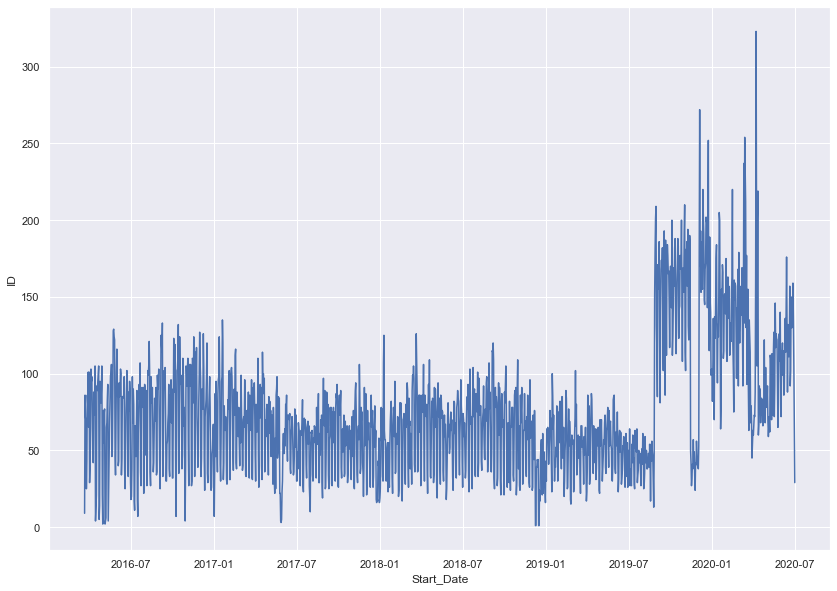

In [49]:
sns.lineplot(x = 'Start_Date', y = 'ID', data = calicars)

In [13]:
#Precipitation and Windchill Columns Are Missing More than Half Values 
accidents3.isnull().sum()

ID                        0
TMC                  147091
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Description               0
Street                    0
Side                      0
City                     15
County                    0
State                     0
Zipcode                 145
Country                   0
Timezone                568
Temperature(F)         9318
Wind_Chill(F)        265645
Humidity(%)            9906
Pressure(in)           7927
Visibility(mi)        10730
Wind_Direction         8329
Wind_Speed(mph)       64916
Precipitation(in)    288251
Weather_Condition     10819
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                

In [14]:
for col, values in accidents3.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

ID: 500000
['A-1226926' 'A-1325453' 'A-2537109' ... 'A-223133' 'A-594598' 'A-3455793']


TMC: 20
[201.  nan 241. 229. 245. 222. 406. 244. 343. 246. 203. 202. 339. 247.
 248. 206. 236. 336. 341. 239. 200.]


Severity: 4
[3 2 4 1]


Start_Time: 492055
['2019-04-10T06:46:29.000000000' '2019-02-01T06:42:02.000000000'
 '2016-11-16T08:34:24.000000000' ... '2017-01-11T06:19:21.000000000'
 '2020-03-13T16:04:28.000000000' '2019-05-08T03:27:29.000000000']


End_Time: 493382
['2019-04-10T07:32:00.000000000' '2019-02-01T07:26:44.000000000'
 '2016-11-16T14:34:24.000000000' ... '2017-01-11T07:04:05.000000000'
 '2020-03-13T17:38:50.000000000' '2019-05-08T03:56:24.000000000']


Start_Lat: 298716
[33.993351 33.102467 35.06842  ... 29.761812 30.272224 33.711884]


Start_Lng: 297392
[-118.403702  -86.73893   -90.02576  ...  -95.349892  -97.732307
 -112.117386]


Distance(mi): 7556
[ 0.         14.59000015  0.493      ...  4.507       3.314
  3.037     ]


Description: 366790
['Restrictions due to acciden

In [15]:
# accidents3.loc[accidents3['Weather_Condition'].str.contains('Rain'), 'Weather_Condition'] = 'Rain'
# accidents3.loc[accidents3['Weather_Condition'].str.contains('Cloudy'), 'Weather_Condition'] = 'Cloudy'
# accidents3.loc[accidents3['Weather_Condition'].str.contains('Clear'), 'Weather_Condition'] = 'Clear'
# accidents3.loc[accidents3['Weather_Condition'].str.contains('Snow'), 'Weather_Condition'] = 'Snow'


# Vizualizations

In [16]:
accidents3.groupby(['Severity', 'DayOfWeek']).size()

Severity  DayOfWeek
1         Fri            794
          Mon            684
          Sat            318
          Sun            329
          Thurs          734
          Tues           652
          Wed            672
2         Fri          62553
          Mon          58675
          Sat          16008
          Sun          14368
          Thurs        61594
          Tues         62749
          Wed          61886
3         Fri          25078
          Mon          22317
          Sat          12435
          Sun          10860
          Thurs        23891
          Tues         23761
          Wed          23770
4         Fri           2620
          Mon           2545
          Sat           1735
          Sun           1576
          Thurs         2448
          Tues          2533
          Wed           2415
dtype: int64

In [17]:
pd.crosstab(accidents3['Severity'], accidents3['DayOfWeek'])

DayOfWeek,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
Severity,,,,,,,
1,794,684,318,329,734,652,672
2,62553,58675,16008,14368,61594,62749,61886
3,25078,22317,12435,10860,23891,23761,23770
4,2620,2545,1735,1576,2448,2533,2415


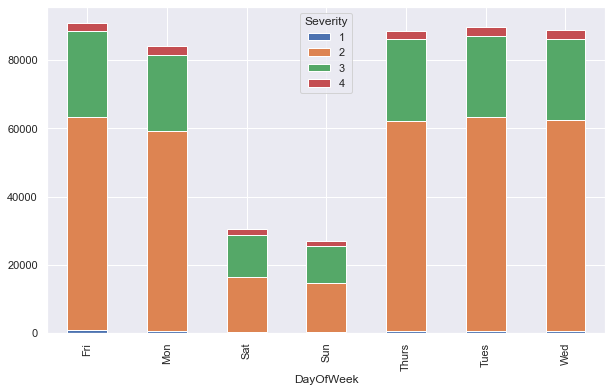

In [18]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(rc={'figure.figsize': (10, 6)})
tab = pd.crosstab(accidents3['DayOfWeek'], accidents3['Severity'], margins=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=True)
plt.show()

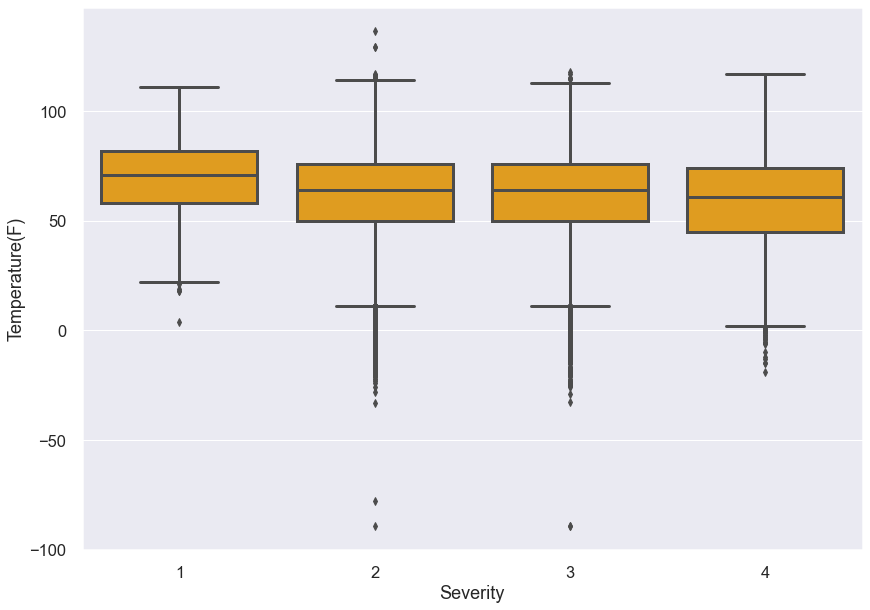

In [19]:
sns.set(rc={'figure.figsize': (14, 10)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
ax = sns.boxplot(x = 'Severity', y = 'Temperature(F)', data = accidents3, color = 'orange')

In [21]:
# DayOfWeek with Severity, TimeZone, Temperature, Wind_Chill, Humidity, Pressure, Visibility, , Weather Conditions

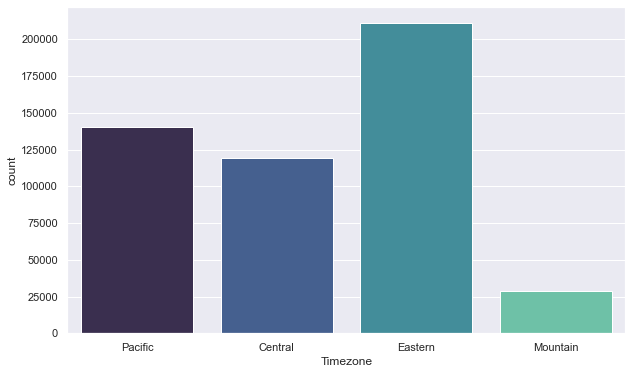

In [22]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.countplot(x="Timezone", data=accidents3, palette='mako');

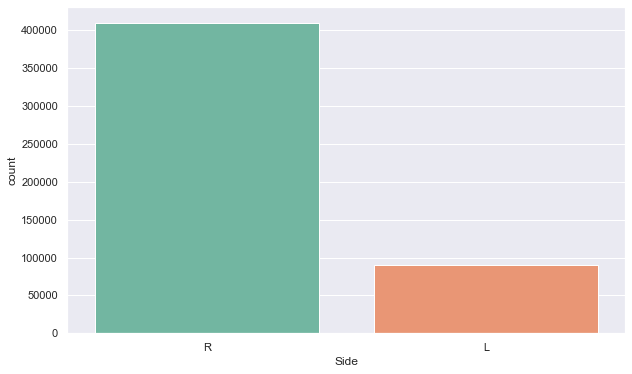

In [23]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.countplot(x="Side", data=accidents3, palette='Set2');

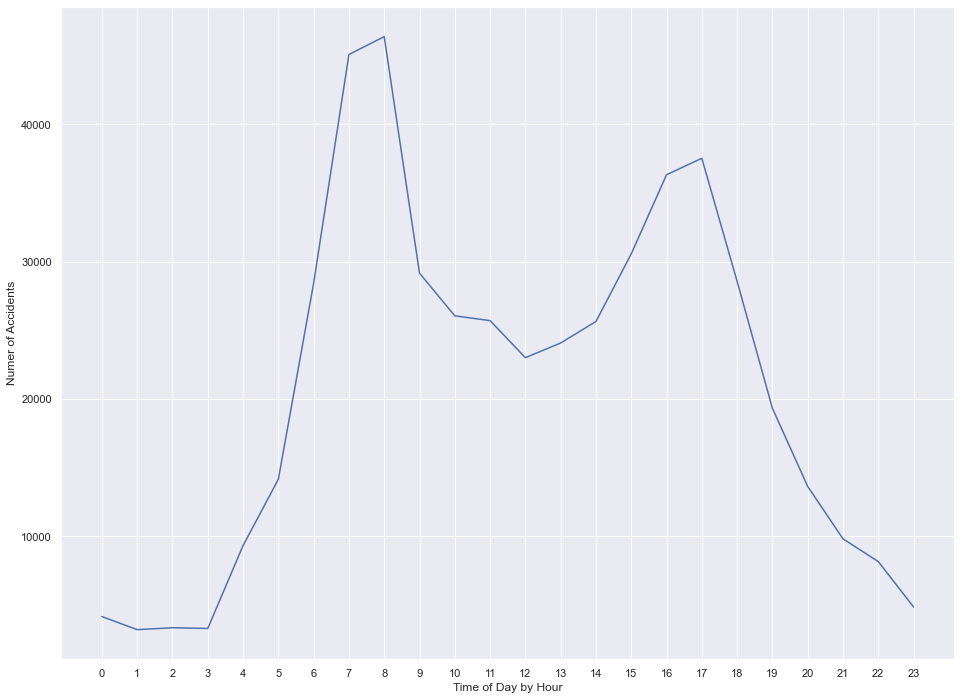

In [24]:
#Accidents by Hour
sns.set(rc={'figure.figsize': (16, 12)})
hours = [hour for hour, df in accidents3.groupby('Hour')]
plt.plot(hours, accidents3.groupby(['Hour'])['ID'].count())
plt.xticks(hours)
plt.xlabel('Time of Day by Hour')
plt.ylabel('Numer of Accidents')
plt.grid(True)
plt.show()

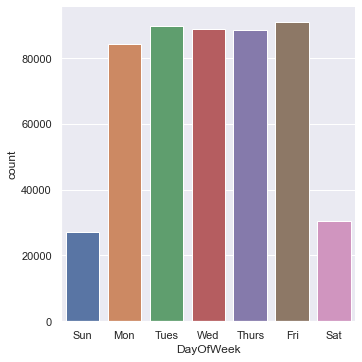

In [25]:
#Accidents by Day
sns.catplot(x = 'DayOfWeek', data=accidents3, kind='count', order=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'])

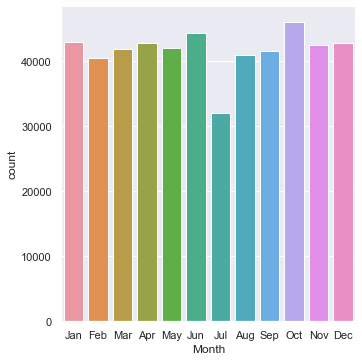

In [26]:
#Accidents by Month
sns.set(rc={'figure.figsize': (16, 12)})
sns.set_palette('GnBu_d')
sns.catplot(x = 'Month', data=accidents3, kind='count', order =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

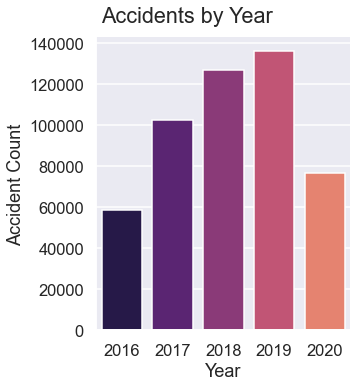

In [27]:
#Accidents by Year - each bar graph its own year February to June, for each year ... assign to new data frame and plot
sns.set_context('talk')
sns.set_palette('magma')
a = sns.catplot(x='Year',data=accidents3,kind='count')
a.fig.suptitle('Accidents by Year ',y=1.03)
a.set(ylabel='Accident Count',xlabel='Year')
plt.show()

In [28]:
#Group actual datafram by day or group by month ... less rows 3.5M row datafram 

In [ ]:
hours = [hour for hour, df in accidents3.groupby('Hour')]
plt.plot(hours, accidents3.groupby(['Hour'])['ID'].count())
plt.xticks(hours)
plt.xlabel('Time of Day by Hour')
plt.ylabel('Numer of Accidents')
plt.grid(True)
plt.show()

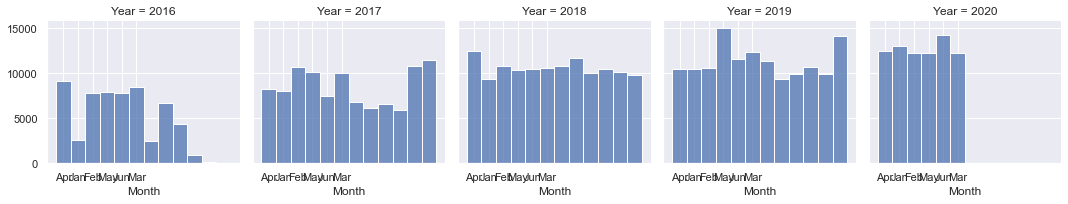

In [29]:
sns.set(rc={'figure.figsize': (16, 12)})
g = sns.FacetGrid(accidents3, col="Year")
g.map(sns.histplot, "Month")

<AxesSubplot:>

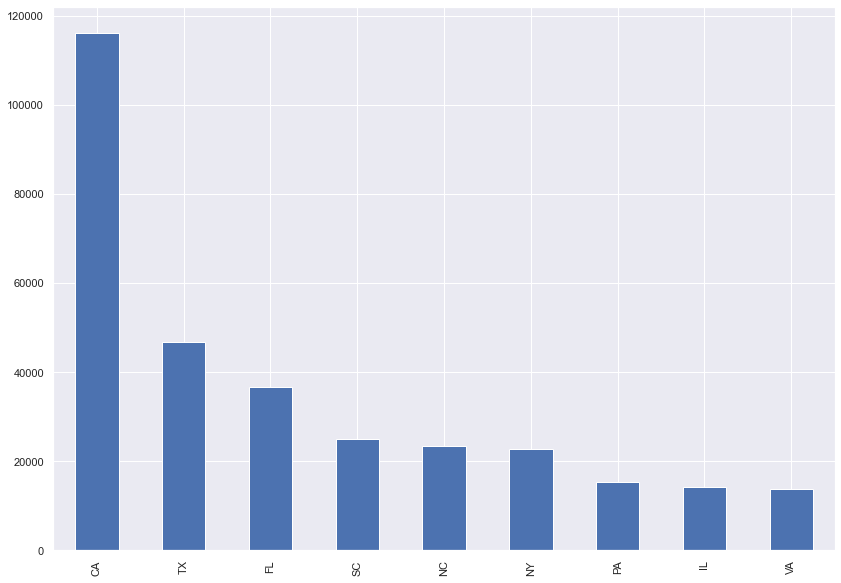

In [30]:
accidents4 = accidents3.State.value_counts()[0:9]
sns.set(rc={'figure.figsize': (14, 10)})
accidents4.plot(kind='bar')

In [ ]:
ax = sns.catplot(x = "Severity", y = "Temperature(F)", data = accidents3)

In [ ]:
#Positive Relationships
#Negative Relationships
corr = accidents3.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
num_df = accidents3[['TMC', 'Severity', 'Wind_Chill(F)','Humidity(%)','Temperature(F)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Railway', 'Station', 'Traffic_Calming', 'Traffic_Signal', 'Year', 'Hour']]

In [ ]:
plt.matshow(num_df.corr())
f = plt.figure(figsize=(19, 15))
plt.matshow(num_df.corr(), fignum=f.number)
plt.xticks(range(num_df.shape[1]), num_df.columns, fontsize=14, rotation=45)
plt.yticks(range(num_df.shape[1]), num_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

In [ ]:
fig, ax=plt.subplots(figsize=(16,6))
accidents3['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Weather Conditions',fontsize=20)
plt.ylabel('Accident Count',fontsize=15)
ax.tick_params(labelsize=20)
plt.title('5 Most Common Weather Conditions for Accidents',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
fig, ax=plt.subplots(figsize=(16,6))
accidents3['Minute'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Minute',fontsize=20)
plt.ylabel('Accident Count',fontsize=15)
ax.tick_params(labelsize=20)
plt.title('5 Most Common Duration Times for Accidents',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
fig, ax=plt.subplots(figsize=(20,6))
accidents3['Minute'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Minute',fontsize=20)
plt.ylabel('Accident Count',fontsize=15)
ax.tick_params(labelsize=20)
plt.title('5 Most Common Duration Times for Accidents',fontsize=25)
plt.grid()
plt.ioff()

In [ ]:
accidents3.Severity.value_counts()

In [ ]:
#Accidents by Severity

sns.set(rc={'figure.figsize': (6, 6)})
sns.set_context("poster", font_scale = .75, rc={"grid.linewidth": 1.0})
sns.countplot(x="Severity", data=accidents3, palette='autumn');

In [ ]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.catplot(x="Severity", y="Minute", hue="Sunrise_Sunset",
            palette={"Day": "g", "Night": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=accidents3)

In [ ]:
#do groupby function and day of week with regard to sunrise and sunset

In [ ]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.catplot(x="Sunrise_Sunset", y="Minute", hue="Severity", kind="point", data=accidents3);

In [ ]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.catplot(x="Severity", y="Minute", hue="Sunrise_Sunset", kind="point", data=accidents3);

In [ ]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.catplot(x="DayOfWeek", y="Minute", hue="Sunrise_Sunset", kind="point", data=accidents3, order=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']);

In [ ]:
#Accidents by Severity and Weather_Condition

In [ ]:
#Accidents by Severity and Sunrise_Sunset

In [ ]:
#Accidents by Severity and 

In [ ]:
#Accidents by Severity and 

# Hypothesis Testing - Weather Conditions

In [ ]:
from collections import Counter
from scipy.stats import chi2_contingency

In [ ]:
#Accidents by Severity and Weather_Condition
observed = pd.crosstab(accidents3['Severity'], accidents3['Weather_Condition'])

In [ ]:
chi2_contingency(observed)

In [ ]:
chi2, p, dof, expected = chi2_contingency(observed.values)

if p < 0.05:    # alpha value is 0.05 or 5% 
   print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

print(f'The test statistic is {chi2}. \nThe p value is {p}.')

# Hypothesis Testing - Sunrise & Sunset

In [ ]:
#Accidents by Severity and Sunrise_Sunset
observed2 = pd.crosstab(accidents3['Severity'], accidents3['Sunrise_Sunset'])

In [ ]:
chi2_contingency(observed2)

In [ ]:
chi2, p, dof, expected = chi2_contingency(observed2.values)

if p < 0.05:    # alpha value is 0.05 or 5% 
   print("We reject the null hypothesis")
else:
  print("We fail to reject the null hypothesis")

print(f'The test statistic is {chi2}. \nThe p value is {p}.')